# Linear Regression with Synthetic Data

Estimated coefficients (true, linear regression):
82.1903908407869 [82.1313384]


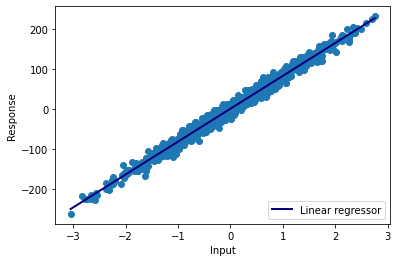

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets

n_samples = 1000

X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max(), 0.2)[:, np.newaxis]
line_y = lr.predict(line_X)
print("Estimated coefficients (true, linear regression):")
print(coef, lr.coef_)
lw = 2
plt.scatter(X, y)
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show() 


# Regression by Using Normal Equation

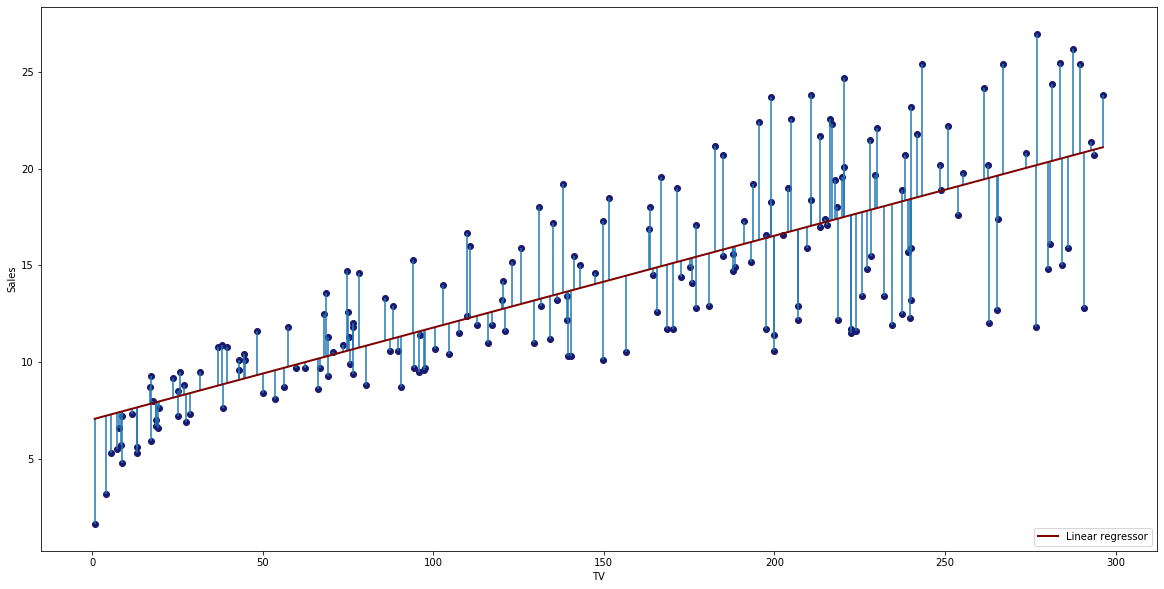

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import collections as matcoll
import pandas as pd

df = pd.read_csv (r'data/Advertising.csv')
data = df.to_numpy()
N = len(df.index)
X = data[:,1].T
y = data[:, -1]
X = np.append(np.ones((N, 1)), X.reshape(N,1), axis=1)
what = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)

# Predict data of estimated models
line_X = np.arange(X.min(axis=0)[1], X.max(axis=0)[1], 0.2)[:, np.newaxis]
line_y = what[1]*line_X + what[0]
lw = 2
fig, ax = plt.subplots(figsize=(20, 10))

yhat = what[1]*X[:,1] + what[0]
lines = []
for i in range(len(X[:,1])):
    pair=[(X[i,1],yhat[i]), (X[i,1], y[i])]
    lines.append(pair)

linecoll = matcoll.LineCollection(lines)
ax.plot(line_X, line_y, color='maroon', linewidth=lw, label='Linear regressor')

ax.add_collection(linecoll)
ax.scatter(X[:,1], y, color='midnightblue')
ax.legend(loc='lower right')
ax.set_xlabel("TV")
ax.set_ylabel("Sales")
plt.show()


In [77]:
RSS = np.sum((yhat - y)**2)
RSS
RSE = np.sqrt(1/(N-2)*RSS)
RSE
TSS = np.sum((y - np.mean(y))**2)
TSS

5417.14875

In [79]:
# Residual Sum of Sqaures (RSS)
RSS = np.sum((yhat - y)**2)
# Residual Standard Error (RSE)
RSE = np.sqrt(1/(N-2)*RSS)
# Total Sum of Squares (TSS)
TSS = np.sum((y - np.mean(y))**2)
R2 = (TSS - RSS)/TSS
R2

0.6118750508500711

# Regression by Using sklearn

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import collections as matcoll
import pandas as pd
from sklearn import linear_model, datasets

df = pd.read_csv (r'data/Advertising.csv')
data = df.to_numpy()
N = len(df.index)
X = data[:,1]
y = data[:, -1]
X = X.reshape(N,1)

lr = linear_model.LinearRegression()
lr.fit(X, y)
what[0] = lr.intercept_
what[1] = lr.coef_


# Predict data of estimated models
line_X = np.arange(X.min(), X.max(), 0.2)[:, np.newaxis]
line_y = lr.predict(line_X)
lw = 2
fig, ax = plt.subplots(figsize=(20, 10))

yhat = lr.predict(X)
lines = []
for i in range(len(X)):
    pair=[(X[i],yhat[i]), (X[i], y[i])]
    lines.append(pair)

linecoll = matcoll.LineCollection(lines)
ax.plot(line_X, line_y, color='maroon', linewidth=lw, label='Linear regressor')

ax.add_collection(linecoll)
ax.scatter(X, y, color='midnightblue')
ax.legend(loc='lower right')
ax.set_xlabel("TV")
ax.set_ylabel("Sales")
plt.show()

R2 = lr.score(X,y)

print('R2 =', R2)
sigma2 = np.var(y - yhat)
SEw0 =  sigma2*(1/N + np.mean(X)**2/np.sum((X - np.mean(X))**2)



SyntaxError: unexpected EOF while parsing (Temp/ipykernel_9996/296670404.py, line 47)

In [132]:
from scipy.stats import t
R2 = lr.score(X,y)

print('R2 =', R2)
sigma2 = np.var(y - yhat)
SE2w0 =  sigma2*(1/N + np.mean(X)**2/np.sum((X - np.mean(X))**2))
SE2w1 = sigma2/np.sum((X - np.mean(X))**2)
tw1 = (what[1] - 0)/np.sqrt(SE2w1)
tw0 = (what[0] - 0)/np.sqrt(SE2w0)
print('t-statistic for intecept and w1: ', tw1, tw0)
pw1 = t.sf(np.abs(tw1), N-2)
pw0 = t.sf(np.abs(tw0), N-2)
print('pvale  for intecept and w1: ', pw0, pw1)
# As p-values are much smaller than 0.0001, there is a relationship between X and y.


R2 = 0.611875050850071
t-statistic for intecept and w1:  17.756631834721684 15.437657402775416
pvale  for intecept and w1:  4.079313830367027e-36 3.978949782180864e-43


In [131]:
t.sf(np.abs(2.75), 198)

0.0032557721142382535

# $t$-Distribution

&lt;matplotlib.legend.Legend at 0x16798a5d888&gt;

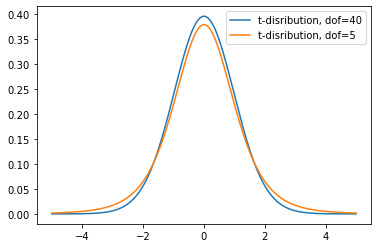

In [2]:
## Basic T-Distribution
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

## Setup      
dof = 40        # Degrees of freedom
alpha = 0.05    # Significence level
ntails = 2      # Number of tails 

## Calculate critical t-score
# tcrit = abs(st.t.ppf(alpha/ntails, dof))
# +=2.068

plt.figure()
xs = np.linspace(-5,5,1000)
plt.plot(xs, st.t.pdf(xs,40),  label="t-disribution, dof=40")
plt.plot(xs, st.t.pdf(xs,5),  label="t-disribution, dof=5")

## Plot some vertical lines representing critical t-score cutoff
# critline = np.linspace(0,alpha/ntails)  # y range for critical line, AKA probability from 0-p*
# xs_1 = len(critline) * [-tcrit]         # X ranges for plotting
# xs_2 = len(critline) * [tcrit]
# plt.plot(xs_1, critline, 'r', label="-t* for dof=23")
# plt.plot(xs_2, critline,'r', label="t* for dof=23")

section = np.arange(-1, 1, 1/20.)
# plt.fill_between(section,f(section))
plt.legend()

# Multiple Regression

In [87]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import collections as matcoll
import pandas as pd
from sklearn import linear_model, datasets

df = pd.read_csv (r'data/Advertising.csv')
data = df.to_numpy()
N = len(df.index)
X = data[:,1:4]
y = data[:, -1]
X = X.reshape(N,3)

lr = linear_model.LinearRegression()
lr.fit(X, y)
what = np.concatenate((lr.intercept_.ravel(), lr.coef_.ravel()), axis=0)




# # Predict data of estimated models
# line_X1 = np.arange(X[:, 0].min(), X[:, 0].max(), 0.2)[:, np.newaxis]
# line_X2 = np.arange(X[:, 1].min(), X[:, 1].max(), 0.2)[:, np.newaxis]
# XX, YY = np.meshgrid(line_X1, line_X2)
# D = np.concatenate((np.reshape(XX, (-1, 1)),np.reshape(YY, (-1, 1))), axis = 1)
# line_y = lr.predict(D).reshape(XX.shape)
# lw = 2
# fig, ax = plt.subplots(figsize=(20, 10))

# yhat = lr.predict(X)
# lines = []
# for i in range(len(X)):
#     pair=[(X[i],yhat[i]), (X[i], y[i])]
#     lines.append(pair)

# linecoll = matcoll.LineCollection(lines)
# ax.plot(line_X, line_y, color='maroon', linewidth=lw, label='Linear regressor')

# ax.add_collection(linecoll)
# ax.scatter(X, y, color='midnightblue')
# ax.legend(loc='lower right')
# ax.set_xlabel("TV")
# ax.set_ylabel("Sales")
# plt.show()

# R2 = lr.score(X,y)

# print('R2 =', R2)
# sigma2 = np.var(y - yhat)
# SEw0 =  sigma2*(1/N + np.mean(X)**2/np.sum((X - np.mean(X))**2)

what

In [4]:
# from mpl_toolkits.mplot3d import axes3d
# from matplotlib import cm
# fig = plt.figure(num=1, clear=True)
# ax = fig.add_subplot(1, 1, 1, projection='3d')
# ax.scatter(XX, YY, line_y, cmap=cm.hot, alpha=0.2)
# ax.set(xlabel='TV', ylabel='Radio', zlabel='Sales', title='Sales')
# # ax.contourf(X[:,0], X[:,1], line_y )

# fig.tight_layout()

# Polynomial Regression

Automatically created module for IPython interactive environment


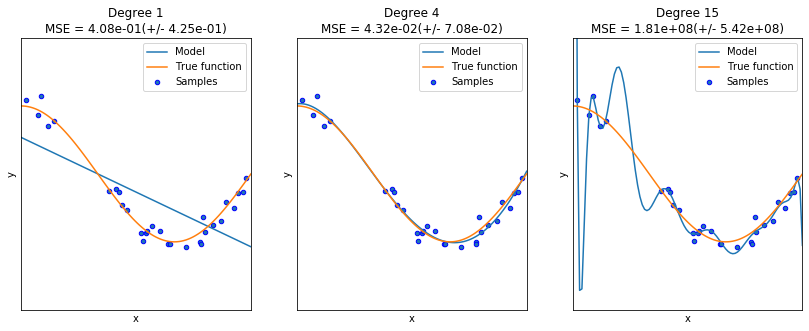

In [30]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))

# plt.savefig('./figures/polynomial_regresion.png')        
plt.show()

# Polynomial Ridge Regression

Automatically created module for IPython interactive environment


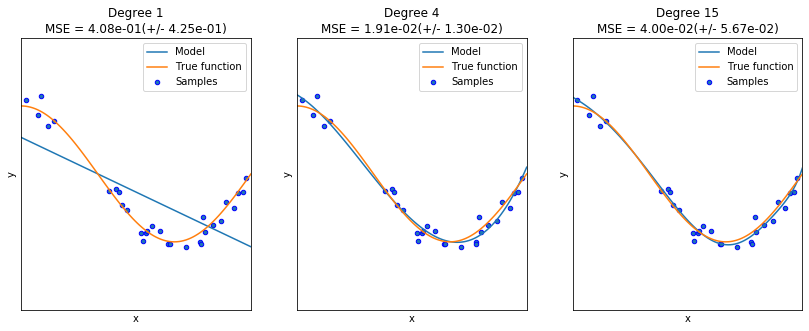

In [31]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]
alpha = 0.0001 # lambda in the slides

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    ridge = linear_model.Ridge(alpha=alpha, fit_intercept=True)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("ridge_regresssion", ridge)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))

plt.savefig('./figures/polynomial_ridge_regresion.png')        
plt.show()

# Ridge Coefficients as a Function of the Regularization

Automatically created module for IPython interactive environment


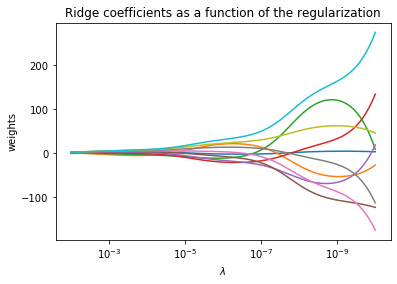

In [28]:
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('$\lambda$')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
# plt.savefig('./figures/redge_coeff_regularization.png')
plt.show()

# Ploymonial Regression with Multipel Regressors

In [94]:
print(__doc__)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

degrees = [1, 2, 3]
alpha = 0.0001 # lambda in the slides

df = pd.read_csv (r'data/Advertising.csv')
data = df.to_numpy()
N = len(df.index)
X = data[:,1:4]
y = data[:, -1]
X = X.reshape(N,3)

for i in range(len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    ridge = linear_model.Ridge(alpha=alpha, fit_intercept=True)
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("ridge_regresssion", ridge)])
    pipeline.fit(X, y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X, y, scoring="neg_mean_squared_error", cv=10)
    print("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

Automatically created module for IPython interactive environment
Degree 1
MSE = 3.06e+00(+/- 1.83e+00)
Degree 2
MSE = 4.30e-01(+/- 4.56e-01)
Degree 3
MSE = 3.19e-01(+/- 3.31e-01)


In [95]:
ridge.coef_

array([ 8.96744283e-02,  3.87306367e-02,  1.40116757e-02, -4.39852527e-04,
        1.38525357e-03, -2.11551519e-04, -5.78621622e-04, -3.39037848e-04,
        2.30693252e-04,  7.62775835e-07, -1.21636833e-06,  7.24494002e-07,
        1.79932450e-06, -1.51021240e-06, -1.14841410e-07,  3.32748805e-06,
        4.93904062e-06,  2.67349447e-06, -2.30514927e-06])

In [96]:
ridge.intercept_

3.943573963059615

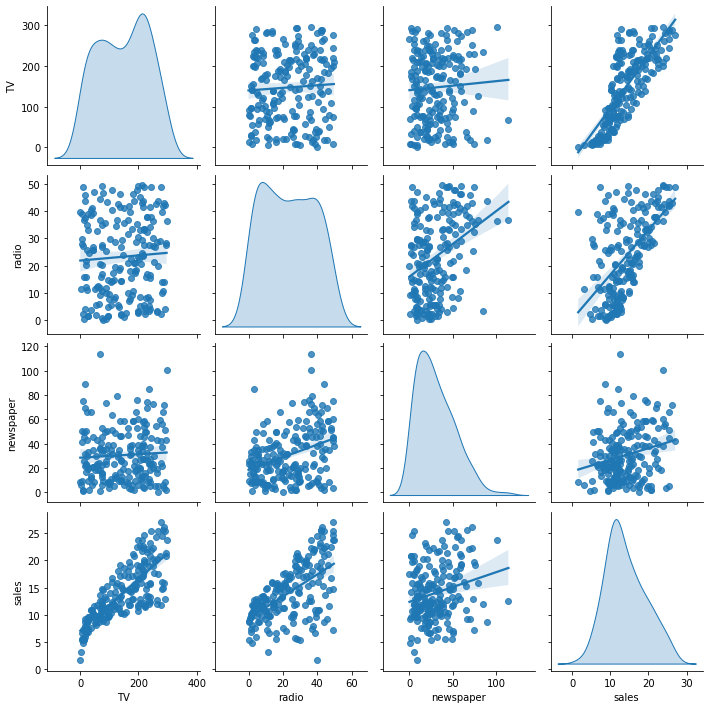

In [5]:
import pandas as pd
import seaborn as sns

df = pd.read_csv (r'data/Advertising.csv')
df = df.drop(columns=['Unnamed: 0'])

_ = sns.pairplot(df, kind='reg', diag_kind='kde')

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv (r'data/Advertising.csv')
df.head()
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']
mod = sm.OLS(y,sm.add_constant(X))
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           1.58e-96
Time:                        16:46:32   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0